In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Paulo\Documents\GitHub\CD_projeto3\Projeto-3


In [4]:
def minimos_quadrados(x,y):
    
    x = sm.add_constant(x)
    est = sm.OLS(y, x)
    est = est.fit()

    X_prime = np.linspace(Data_Total.Label.min(), Data_Total.Label.max(), 1000)[:, np.newaxis]
    X_prime = sm.add_constant(X_prime)  # add constant as we did before
    y_hat = est.predict(X_prime)
    summary = est.summary()
    
    return X_prime,y_hat,summary

In [5]:
label = pd.read_excel('indicator_t above 15 labour to pop percent.xlsx') #Taxa de população economicamente ativa
government = pd.read_excel('government.xlsx') #Per capita government expenditure on health at average exchange rate (US$)
expenditure = pd.read_excel('indicator_f above 15 employ.xlsx') #Expenditure per student, primary (% of GDP per capita)

# Todos os dados são referentes ao ano de 2007

In [6]:
label.head()


,Paises,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,year
0,Afghanistan,59.400002,59.400002,59.299999,59.299999,59.200001,59.200001,59.099998,59.099998,59.000000,...,58.400002,58.400002,58.500000,58.500000,58.599998,58.799999,58.900002,59.000000,59.200001,59.599998
1,Albania,75.599998,75.300003,75.099998,74.800003,74.500000,74.599998,74.400002,75.000000,75.599998,...,61.400002,61.299999,61.099998,60.900002,60.799999,60.799999,60.599998,60.400002,60.200001,60.299999
2,Algeria,44.700001,44.900002,44.799999,44.799999,44.799999,44.900002,45.700001,46.500000,47.299999,...,54.299999,54.599998,55.000000,55.599998,55.900002,56.099998,56.400002,56.599998,57.000000,57.299999
3,Angola,81.400002,81.400002,81.500000,81.500000,81.500000,81.599998,81.599998,81.699997,81.800003,...,81.800003,81.800003,81.699997,81.599998,81.599998,81.599998,81.599998,81.500000,81.500000,81.699997
4,Argentina,52.299999,52.500000,52.799999,53.099998,53.000000,53.000000,53.000000,53.000000,53.099998,...,59.299999,59.700001,60.099998,60.400002,60.799999,61.200001,61.599998,61.900002,62.299999,62.299999


In [7]:
government.head()


,Paises,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,year,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832643,1.250118,1.614160,2.525066,2.813779,3.503426,3.744613,3.908887,4.390408
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,13.940591,17.062074,14.164771,18.625848,28.139706,27.160512,30.509619,32.549902,40.609457,63.935601,71.356600,75.552514,88.762634,109.074284,106.893745,94.023613
4,Algeria,46.771460,47.960053,49.738400,48.670547,45.543825,45.911114,52.509423,54.078381,62.637209,63.229395,69.295636,81.679706,108.904747,147.820706,143.160577,138.840923


In [8]:
expenditure.head()

,Paises,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,year
0,Afghanistan,26.900000,26.600000,26.500000,26.200001,26.100000,25.900000,25.900000,25.799999,25.700001,25.799999,26.100000,26.200001,25.100000,26.299999,24.799999,26.200001,25.600000
1,Albania,42.500000,41.900002,41.900002,42.200001,42.400002,42.299999,42.099998,42.099998,42.099998,42.099998,42.099998,42.200001,42.099998,42.099998,42.000000,41.900002,42.099998
2,Algeria,17.900000,17.799999,18.500000,18.799999,18.299999,19.100000,19.900000,20.299999,20.600000,20.600000,22.100000,23.100000,24.400000,27.299999,28.799999,30.500000,31.700001
3,Angola,68.800003,69.599998,68.300003,69.300003,67.699997,67.800003,67.699997,68.099998,68.300003,68.000000,68.000000,68.300003,68.199997,68.400002,68.699997,69.199997,69.400002
4,Argentina,36.599998,36.900002,37.000000,37.299999,37.200001,38.400002,39.200001,39.700001,40.000000,40.900002,41.400002,41.700001,43.599998,44.400002,45.099998,45.799999,45.900002


In [9]:
Data_Total = pd.DataFrame()
desemprego_dados = list(label.Paises)
government_list = []
expenditure_list = []
filtered_list = []

government_indices = []
label_indices = []
expenditure_indices = []

label_num = []
government_num = []
expenditure_num = []

for element in range(len(expenditure.Paises)):    
    if expenditure.Paises[element] in desemprego_dados:
        expenditure_list.append(expenditure.Paises[element])
        expenditure_indices.append(element)
for element in range(len(government.Paises)):    
    if government.Paises[element] in desemprego_dados:
        government_list.append(government.Paises[element]) 
        government_indices.append(element)
if len(government_list) < len(expenditure_list):
    for element in range(len(government_list)):    
        if government_list[element] in expenditure_list:
            filtered_list.append(government_list[element])  
else:
    for element in range(len(expenditure_list)):    
        if expenditure_list[element] in government_list:
            filtered_list.append(expenditure_list[element])

for element in filtered_list:    
    label_indices.append(desemprego_dados.index(element))
    
for element in range(len(filtered_list)):    
    label_num.append(label.year[label_indices[element]])     

for element in range(len(filtered_list)):    
    government_num.append(government.year[government_indices[element]])  

for element in range(len(filtered_list)):    
    expenditure_num.append(expenditure.year[expenditure_indices[element]])      

Data_Total["Paises"] = filtered_list  
Data_Total["Label"] = label_num  
Data_Total["Government"] = government_num        
Data_Total["Expenditure"] = expenditure_num

Data_Total= Data_Total[~np.isnan(Data_Total.Label)]
Data_Total= Data_Total[~np.isnan(Data_Total.Government)]
Data_Total= Data_Total[~np.isnan(Data_Total.Expenditure)]

Data_Total

,Paises,Label,Government,Expenditure
0,Afghanistan,59.599998,3.503426,25.600000
1,Albania,60.299999,88.762634,42.099998
2,Algeria,57.299999,108.904747,31.700001
3,Angola,81.699997,68.385205,69.400002
4,Argentina,62.299999,333.859695,45.900002
5,Armenia,61.000000,48.331479,34.200001
6,Australia,64.300003,2670.987968,54.599998
7,Austria,59.700001,3517.034374,49.700001
8,Azerbaijan,65.199997,36.727260,56.200001
9,Bahamas,72.199997,804.805070,60.700001


-0.0252704571182
0.160370441559


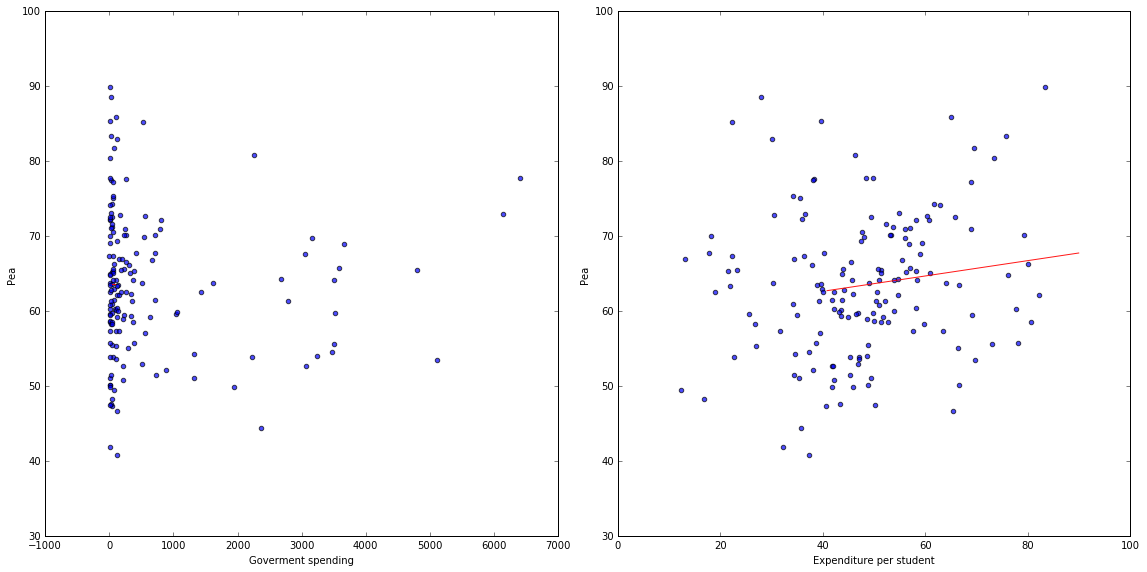

In [10]:
f, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].scatter(Data_Total.Government, Data_Total.Label, alpha=0.7)  # Plot the raw data
ax[0].set_xlabel("Goverment spending")
ax[0].set_ylabel("Pea")

y = Data_Total.Label #variavel resposta
x = Data_Total.Government

print(np.corrcoef(x,y)[0][1])


X_prime,y_hat,summary_G = minimos_quadrados(x,y)
ax[0].plot(X_prime[:, 1], y_hat, 'r', alpha=0.9) 

ax[1].scatter(Data_Total.Expenditure, Data_Total.Label, alpha=0.7)  # Plot the raw data
ax[1].set_xlabel("Expenditure per student")
ax[1].set_ylabel("Pea")

x = Data_Total.Expenditure

print(np.corrcoef(x,y)[0][1])
X_prime,y_hat,summary_E = minimos_quadrados(x,y)
ax[1].plot(X_prime[:, 1], y_hat, 'r', alpha=0.9) 

plt.tight_layout(1)





In [11]:
X=Data_Total.iloc[:,(2,3)]

X=sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Label   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.123
Date:                Tue, 06 Dec 2016   Prob (F-statistic):              0.123
Time:                        13:59:00   Log-Likelihood:                -570.48
No. Observations:                 156   AIC:                             1147.
Df Residuals:                     153   BIC:                             1156.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          58.6467      2.559     22.914      0.000        53.590    63.703
Government     -0.0003      0.001     -0.449      0.654        -0.002     0.001
Expenditure     0.1038      0.051      2.036      0.043         0.003     0.205
==============================================================================
Omnibus:                        3.471   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.179
Skew:                           0.348   Prob(JB):                        0.204
Kurtosis:                       3.077   Cond. No.                     4.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

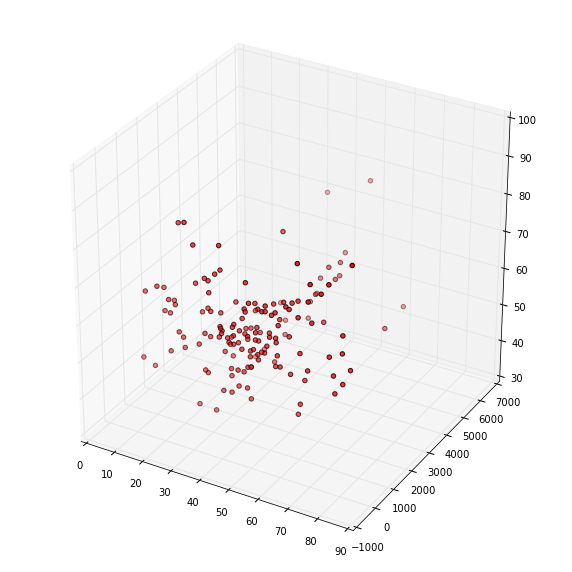

In [31]:


fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(Data_Total.Expenditure,Data_Total.Government, Data_Total.Label,c = 'r')


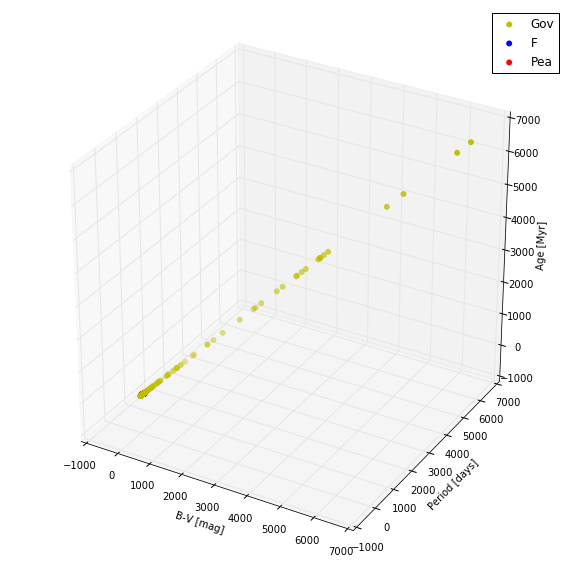

In [60]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')



ax.scatter(Data_Total.Government,Data_Total.Government,Data_Total.Government,edgecolor='none',c='y',marker='o',s=35,label='Gov')
ax.scatter(Data_Total.Expenditure,Data_Total.Expenditure,Data_Total.Expenditure,edgecolor='none',c='b',marker='o',s=35,label='F')
ax.scatter(Data_Total.Label,Data_Total.Label,Data_Total.Label,edgecolor='none',c='r',marker='o',s=35,label='Pea')

ax.set_xlabel('B-V [mag]')
ax.set_ylabel('Period [days]')
ax.set_zlabel('Age [Myr]')



ax.legend(scatterpoints=1)

ax.relim()
ax.autoscale_view()

plt.show()